In [39]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import json
import re
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
from scipy.stats import expon

df = pd.read_csv('debates_cleaned1.csv')
df = df[['session', 'year', 'country', 'text', 'tokens']]
df['text'] = df['text'].apply(lambda text: text.replace("\n", ""))
df['tokens'] = df['tokens'].apply(lambda text: text.split())

sia = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['text'].apply(lambda text: sia.polarity_scores(text))
# display(df)

def get_sentiment(dict):
    sentiment = 'neutral'
    if (dict['neg'] > dict['neu']) & (dict['neg'] > dict['pos']):
        sentiment = 'negative'
    elif (dict['pos'] > dict['neu']) & (dict['pos'] > dict['neg']):
        sentiment = 'positive'
    return sentiment

def get_sentiment2(dict):
    sentiment = 'neutral'
    if dict['compound'] > 0:
        sentiment = 'positive'
    else:
        sentiment = 'negative'
    return sentiment
    
df['sentiment'] = df['sentiment_scores'].apply(lambda dict: get_sentiment2(dict))
display(df)
# df.loc[df['sentiment'] != 'negative']

,session,year,country,text,tokens,sentiment_scores,sentiment
0,45,1990,MOZ,"﻿It is with pleasure and satisfaction that, on...","[﻿it, pleasur, satisfact, behalf, behalf, dele...","{'neg': 0.056, 'neu': 0.799, 'pos': 0.145, 'co...",positive
1,45,1990,MLT,﻿It is indeed an honour for me personally and ...,"[inde, honour, person, behalf, maltes, deleg, ...","{'neg': 0.082, 'neu': 0.722, 'pos': 0.196, 'co...",positive
2,45,1990,BLZ,﻿The work of this Organisation over the past y...,"[the, work, organis, past, year, heighten, rea...","{'neg': 0.079, 'neu': 0.734, 'pos': 0.187, 'co...",positive
3,45,1990,PNG,﻿On behalf of the Government and peopleof Papu...,"[﻿on, behalf, govern, peopl, papua, new, guine...","{'neg': 0.07, 'neu': 0.746, 'pos': 0.184, 'com...",positive
4,45,1990,AUS,"﻿It is with great pleasure. Sir, that I congra...","[﻿it, great, pleasur, sir, congratul, elect, p...","{'neg': 0.083, 'neu': 0.718, 'pos': 0.199, 'co...",positive
...,...,...,...,...,...,...,...
4385,68,2013,IRL,"Every day, the peoples of the world whom we ar...","[everi, day, peopl, world, privileg, repres, g...","{'neg': 0.073, 'neu': 0.731, 'pos': 0.196, 'co...",positive
4386,68,2013,PSE,"At the outset, I would like to congratulate Hi...","[outset, would, like, congratul, hi, excel, mr...","{'neg': 0.078, 'neu': 0.725, 'pos': 0.197, 'co...",positive
4387,68,2013,ALB,I am the newly elected Prime Minister of Alban...,"[newli, elect, prime, minist, albania, thi, fi...","{'neg': 0.082, 'neu': 0.738, 'pos': 0.18, 'com...",positive
4388,68,2013,FJI,"At the outset, I wish to congratulate Presiden...","[outset, wish, congratul, presid, ash, elect, ...","{'neg': 0.047, 'neu': 0.773, 'pos': 0.18, 'com...",positive


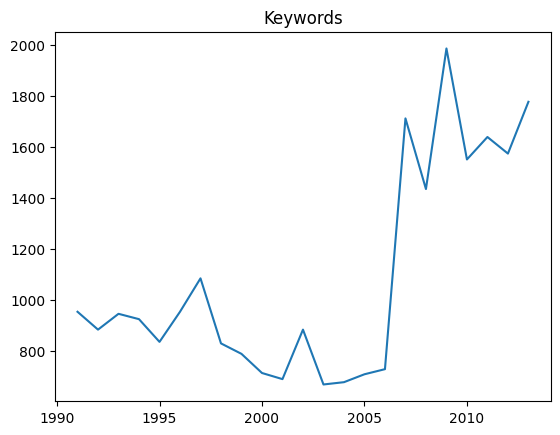

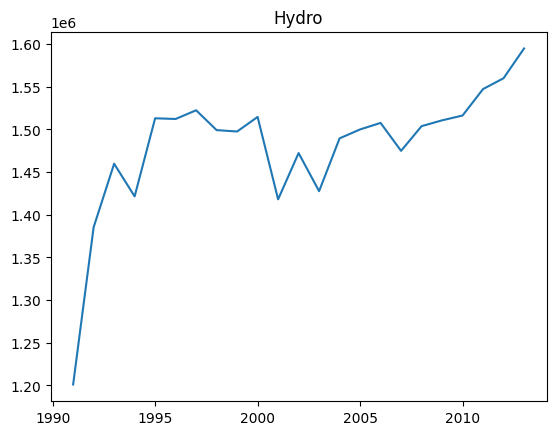

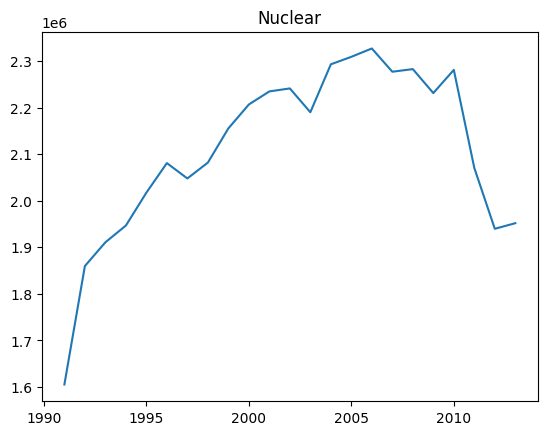

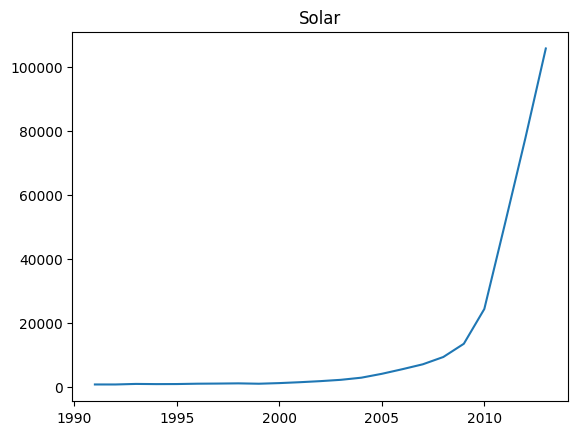

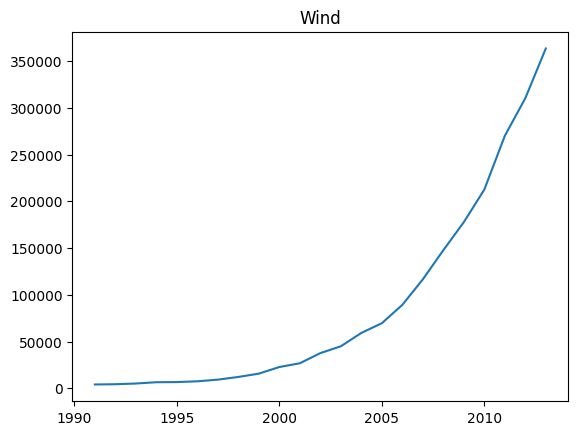

In [47]:
keyword_df = pd.read_csv('processed data/debates_cleaned1.csv')
words = set()
with open('keywords.json', 'r') as file:
    words = set(json.load(file))
with open('lists/pacific_island_states.json', 'r') as file:
    islands = json.load(file)
with open('lists/eu.json', 'r') as file:
    eu = json.load(file)

def count_keywords(tokens):
    counter = 0
    re.sub(r'[^\x20-\x7E]', '', tokens)
    for token in tokens.split():
        counter += 1 if token in words else 0
    return counter

keyword_df['keywords'] = keyword_df['tokens'].apply(count_keywords)
keyword_df = keyword_df.sort_values(by = 'year')
keyword_df = keyword_df.loc[keyword_df['year'] > 1990]
keyword_df = keyword_df.groupby(by = 'year')['keywords'].sum()
# display(keyword_df)

energy_df = pd.read_csv('processed data/merged.csv')
energy_df = energy_df.sort_values(by = 'year')
hydro_df = energy_df.groupby(by = 'year')['Electricity - total hydro production'].sum()
nuclear_df = energy_df.groupby(by = 'year')['Electricity - total nuclear production'].sum()
solar_df = energy_df.groupby(by = 'year')['Electricity - total solar production'].sum()
wind_df = energy_df.groupby(by = 'year')['Electricity - total wind production'].sum()
# display(energy_df)
# display(hydro_df)
# display(nuclear_df)
# display(solar_df)
# display(wind_df)

plt.plot(keyword_df.index, keyword_df)
plt.title('Keywords')
plt.show()

plt.plot(hydro_df.index, hydro_df)
plt.title('Hydro')
plt.show()

plt.plot(nuclear_df.index, nuclear_df)
plt.title('Nuclear')
plt.show()

plt.plot(solar_df.index, solar_df)
plt.title('Solar')
plt.show()

plt.plot(wind_df.index, wind_df)
plt.title('Wind')
plt.show()

In [83]:
with open('keywords.json', 'r') as file:
    words = set(json.load(file))
    
test = "This is a fusion test of a string that is used for biomass idk thing hydro idk maybe"    
    
def find_text_block(strng):
    matches = []
    pattern = re.compile(" | ".join(words))
    r = pattern.search(strng)
    if not r: print("(-1, -1)")
    while r:
        matches.append((r.start(), r.end() - 1))
        r = pattern.search(strng,r.start() + 1) 
    
    return strng[matches[0][0]:matches[-1][1]]
    #return #strng[find[0][0]:find[1][1]]

find_text_block(test)

' fusion test of a string that is used for biomass idk thing hydro'